## ĐỂ XÂY DỰNG MỘT ĐỘI HÌNH MẠNH THÌ TA CẦN NHỮNG GÌ ?
Đó là cần những vị tướng mạnh, cầm những món trang bị tốt và kích hoạt những tộc hệ hợp lí cho chúng. Vậy ta sẽ làm thế nào để tìm ra những thứ đó thì chúng ta sẽ thực hiện ngay bên dưới đây thôi.

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
from itertools import chain

### ĐỌC DỮ LIỆU ĐỂ LẤY TẤT CẢ CÁC MÓN ĐỒ

In [325]:
'''
Lọc trùng theo mã trận đấu và danh sách đồ vì:
* Các người chơi sẽ gặp nhau ở các trận đấu nên mã trận đấu sẽ bị trùng giữa các thư mục ngườichơi
* Có 127 trang bị chia thành 4 loại, mỗi champion có tối đa 3 trang bị chưa kể 1 trận có từ 8-10 trang bị và 6-9 champion 
mà mỗi champion có thể để từ 0-3 trang bị nên số trường hợp tối đa là rất lớn mà dữ liệu đầu vào chỉ có 32000 đội hình nên các bộ trang bị
sẽ không thể bị trùng giữa 2 người chơi khác nhau được!
'''
item_df = pd.read_csv('../Data/process_data_tft_each_item_csv.csv', usecols=[
                      'ID Match', 'List Name Item']).drop_duplicates().reset_index(drop=True)
# item_df = pd.read_csv('process_data_tft_each_item_csv.csv').drop_duplicates()

In [326]:
len(item_df)

18096

### LẤY RA SỐ LƯỢNG ĐỒ CÓ TRONG TRẬN ĐẤU

ast.literak_eval: dùng để biến đổi string thành list

In [327]:
list_items = []
for i in range(len(item_df['List Name Item'])):
    list_items.append(ast.literal_eval(item_df['List Name Item'][i])) 

### TÌM RA MÓN ĐỒ ĐƯỢC SỬ DỤNG NHIỀU NHẤT VÀ ÍT NHẤT

hàm zip dùng để biến 2 list được cho ra thành key và values

lisst(chain) dùng để ép mảng xuống còn 1D và sau đó sort lại

In [328]:
def get_best_worst_items(list_items):
    flatten_list = list(chain.from_iterable(list_items))
    flatten_list = list(chain.from_iterable(flatten_list))
    flatten_list = np.array(flatten_list, dtype = object)
    unique, counts = np.unique(flatten_list, return_counts=True)
    a = dict(zip(unique, counts))
    b = dict(sorted(a.items(), key=lambda item: item[1]))
    best_item = list(b.items())
    worst_item = list(b.items())[0:5]
    return best_item, worst_item

In [329]:
best_item,worst_item = get_best_worst_items(list_items)

5 món đồ tốt nhất và tệ nhất

In [330]:
bar_chart = np.array(best_item[-5:] + worst_item)
bar_chart[:, 0]

array(['TFT_Item_WarmogsArmor', 'TFT_Item_IonicSpark', 'TFT_Item_RedBuff',
       'TFT_Item_JeweledGauntlet', 'TFT_Item_MadredsBloodrazor',
       'TFT5_Item_MorellonomiconRadiant',
       'TFT5_Item_ShroudOfStillnessRadiant',
       'TFT5_Item_FrozenHeartRadiant', 'TFT5_Item_LastWhisperRadiant',
       'TFT5_Item_RedemptionRadiant'], dtype='<U34')

In [331]:
x = bar_chart[:, 0]
y = bar_chart[:, 1]
y = y.astype('int64')
# temp = pd.DataFrame(data= {'col1': x, 'col2': y}).sort_values(by='col2')
# temp.plot.bar(x='col1', y='col2')

In [332]:
x, y

(array(['TFT_Item_WarmogsArmor', 'TFT_Item_IonicSpark', 'TFT_Item_RedBuff',
        'TFT_Item_JeweledGauntlet', 'TFT_Item_MadredsBloodrazor',
        'TFT5_Item_MorellonomiconRadiant',
        'TFT5_Item_ShroudOfStillnessRadiant',
        'TFT5_Item_FrozenHeartRadiant', 'TFT5_Item_LastWhisperRadiant',
        'TFT5_Item_RedemptionRadiant'], dtype='<U34'),
 array([6312, 6347, 7694, 8427, 9805,   12,   12,   14,   14,   14],
       dtype=int64))

Biểu đồ số lượng sử dụng của các trang bị (giữa 5 món nhiều nhất và 5 món ít nhất):

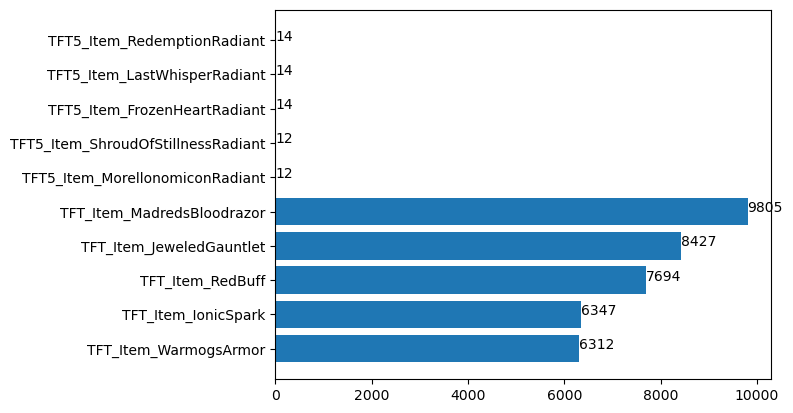

In [333]:
plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
 
plt.show()

Ta thấy 5 món đồ ít nhất có số lượng sử dụng cực kì thấp, chỉ bằng khoảng 0,1% so với món dùng nhiều nhất. Vậy ta có nên sử dụng những món đồ có tỉ lệ sử dụng cao ở trên hay không, cùng tìm hiểu ở phần tiếp theo nhé.

### TÌM VỊ TRÍ TRUNG BÌNH CỦA MÓN ĐỒ ĐÓ TRONG TRẬN ĐẤU

Khi người chơi sử dụng món đồ đó thì sẽ được lọt vào top mấy của game

In [334]:
average_df = pd.read_csv('../Data/process_data_tft_each_item_csv.csv', usecols = ['Puuid', 'Placement', 'List Name Item']).drop_duplicates().reset_index(drop = True)

Chuyển đổi từ string sang list bởi vì đọc từ csv ra các list sẽ bị chuyển thành string

In [335]:
def convert_string_to_list(ok, placement, column):
    temp = ok[ok.eq(placement).any(1)].reset_index(drop=True)
    top = []
    for i in range(len(temp)):
        top.append(ast.literal_eval(temp[column][i]))
    return top

Lọc ra trong những top từ 1 đến 8 số lần item đó được sử dụng

In [336]:
item_on_top = {}
for i in range(1,9,1):
    temp = convert_string_to_list(average_df, i, 'List Name Item')
    temp1 = 'top_' + str(i)
    item_on_top[temp1] = get_best_worst_items(temp)

Top 5 những item được sử dụng khi người chơi đạt top 1 (thấp đến cao)

In [337]:
best_item_top_1, worst_item_top_1 = item_on_top['top_1']
print(best_item_top_1[-5:], "                ", worst_item_top_1[-5:])

[('TFT_Item_SeraphsEmbrace', 1054), ('TFT_Item_IonicSpark', 1114), ('TFT_Item_JeweledGauntlet', 1184), ('TFT_Item_RedBuff', 1194), ('TFT_Item_MadredsBloodrazor', 1510)]                  [('TFT5_Item_RapidFirecannonRadiant', 1), ('TFT5_Item_StatikkShivRadiant', 1), ('TFT5_Item_ArchangelsStaffRadiant', 2), ('TFT5_Item_ChaliceOfPowerRadiant', 2), ('TFT5_Item_GargoyleStoneplateRadiant', 2)]


### TỈ LỆ CỦA MÓN ĐỒ ĐÓ TRONG TRẬN ĐẤU VÀ SỐ LẦN XUẤT HIỆN CỦA MÓN ĐỒ TRONG TỪNG TOP CỦA TRẬN ĐẤU

In [338]:
all_item_df = pd.read_csv("../Data/item_tft_csv.csv", usecols=["Item"])

In [339]:
all_items = all_item_df['Item'].to_list()

item_avg_top: vị trí trung bình của món đồ khi ở trong top từ 1 đến 8

item_avg_on_match: tỉ lệ số trận đấu từ top 1 đến 8 mà món đồ đó được sử dụng

In [340]:
item_avg_top = []
item_avg_on_match = []
match_each_top = []
for item in all_items:
    temp = 0
    sum = 0
    temp1 = []
    for i in range(1,9,1):
        index_top = dict(item_on_top['top_' + str(i)][0])
        if(item in index_top):
            temp = temp+dict(item_on_top['top_' + str(i)][0])[item]*i
            sum = sum + (dict(item_on_top['top_' + str(i)][0])[item])
    temp1.append(temp/sum)
    item_avg_top.append(temp1)


In [341]:
avg_placement_5_worst_best_item = []
for i in bar_chart[:, 0]:
    avg_placement_5_worst_best_item.append(item_avg_top[all_items.index(i)][0])

Biểu đồ vị trí trung bình của 5 món trang bị dùng ít nhất và dùng nhiều nhất:

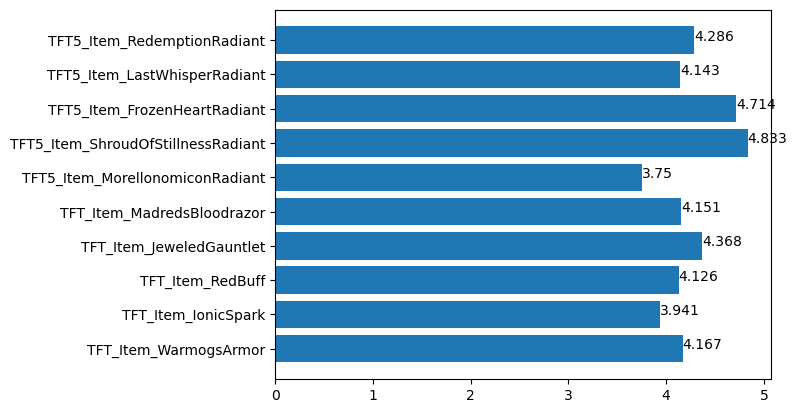

In [342]:
y = avg_placement_5_worst_best_item
plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(round(value, 3)))

plt.show()

Ta có thể thấy các món đồ ít sử dụng có vị trí trung bình thấp hơn những món được sử dụng nhiều nhất, chứng tỏ những món này chưa thực sự hữu ích dành cho người chơi (và trên thực tế những món đồ này khá là khó kiếm do nó là trang bị đặc biệt và có những trang bị đặc biệt khác mạnh hơn chúng nhiều nên chúng ít được người chơi sử dụng). Tuy nhiên vẫn có 1 trường hợp đặc biệt với món trang bị 'MorellonomiconRadiant' khi nó có vị trí trung bình khá cao nhưng vẫn ít được sử dụng, có thể người chơi chưa nhận ra sức mạnh của nó chăng ?

Từ đó ta có thể rút ra nhận xét rằng những món đồ phổ biến kia được dùng nhiều như vậy bởi lẽ nó thực sự là hữu ích và có sức mạnh cao hơn so với những món đồ thuộc top dưới vì vậy hãy tận dụng chúng để có thể dành được top cao. Những cũng đừng quên có một vài trang bị tuy chưa được đánh giá cao nhưng vẫn có một sức mạnh khá tốt như món trang bị 'MorellonomiconRadiant' kia, hãy thử và cảm nhận chúng thế nào

Biểu đồ của 5 món trang bị có vị trí trung bình cao nhất:

In [343]:
ind = np.argpartition(np.array(item_avg_top), 5, axis=0)[:5]
ind

array([[41],
       [85],
       [28],
       [ 6],
       [34]], dtype=int64)

In [344]:
name_placement_5_best_item = []
avg_placement_5_best_item = []
for i in range(5):
    name_placement_5_best_item.append(all_items[ind[i][0]])
    avg_placement_5_best_item.append(item_avg_top[ind[i][0]][0])
avg_placement_5_best_item

[3.1153846153846154, 1.0991189427312775, 3.125, 3.444, 3.4375]

In [345]:
y = name_placement_5_best_item
y

['TFT5_Item_TrapClawRadiant',
 'TFT_Item_EmptyBag',
 'TFT5_Item_LocketOfTheIronSolariRadiant',
 'TFT4_Item_OrnnRanduinsSanctum',
 'TFT5_Item_RunaansHurricaneRadiant']

In [346]:
x = avg_placement_5_best_item
y = name_placement_5_best_item
x, y

([3.1153846153846154, 1.0991189427312775, 3.125, 3.444, 3.4375],
 ['TFT5_Item_TrapClawRadiant',
  'TFT_Item_EmptyBag',
  'TFT5_Item_LocketOfTheIronSolariRadiant',
  'TFT4_Item_OrnnRanduinsSanctum',
  'TFT5_Item_RunaansHurricaneRadiant'])

Biểu đồ của 5 món trang bị có vị trí trung bình cao nhất:

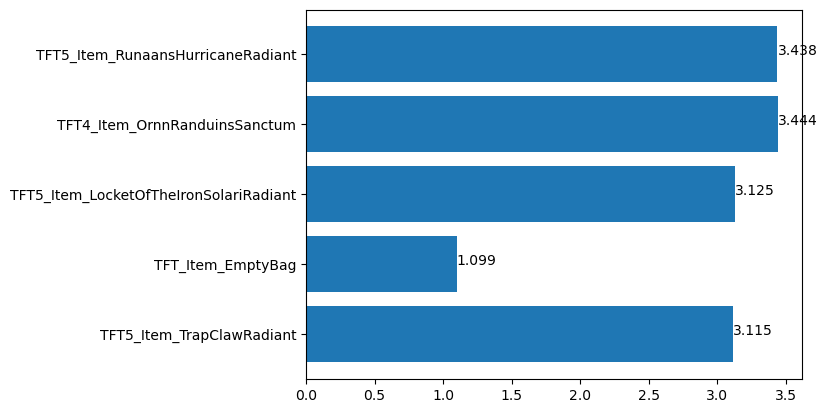

In [347]:
x = name_placement_5_best_item
y = avg_placement_5_best_item
plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(round(value,3)))

plt.show()

Đây là những trang bị có vị trí trung bình cao nhất, tuy nhiên trong đây có một món trang bị đặc thù là 'EmptyBag' nhưng món đồ này là một món đặc biệt được tạo ra từ 1 item khác có tên là 'TFT_Item_ThiefsGloves' nên ta sẽ xem đây như là 1 trường hợp ngoại lệ.

Còn đây là vị trí trung bình của các món trang bị có tỉ lệ top cao nhất, bạn nên sở hữu chúng ngay khi có thể để giành chiến thắng nhé

## TƯƠNG TỰ VỚI TỘC VÀ HỆ

#### Đọc dữ liệu để lấy hệ và tộc

In [348]:
traits_df = pd.read_csv('../Data/process_data_tft_general_csv.csv', usecols = ['ID Match','List Traits','List Number Items']).drop_duplicates().reset_index(drop=True)

In [349]:
list_traits = []

for i in range(len(traits_df['List Traits'])):
    list_traits.append(ast.literal_eval(traits_df['List Traits'][i])) 

### TÌM RA TỘC HỆ ĐƯỢC SỬ DỤNG NHIỀU NHẤT VÀ ÍT NHẤT

In [350]:
def get_best_worst_traits(list_traits):
    flatten_list = list(chain.from_iterable(list_traits))
    flatten_list = np.array(flatten_list, dtype = object)
    cc = flatten_list[0::3]
    unique, counts= np.unique(cc, return_counts=True)
    a = dict(zip(unique, counts))
    b = dict(sorted(a.items(), key=lambda item: item[1]))
    best_traits = list(b.items())
    worst_traits = list(b.items())[:5]
    return best_traits, worst_traits

In [351]:
a, b = get_best_worst_traits(list_traits)
print(a,"                ", b)

[('Set8_Arsenal', 2083), ('Set8_Corrupted', 2743), ('Set8_Forecaster', 3248), ('Set8_Deadeye', 3851), ('Set8_Recon', 4189), ('Set8_Ace', 4514), ('Set8_Renegade', 4654), ('Set8_Defender', 5130), ('Set8_Supers', 5689), ('Set8_Hacker', 5996), ('Set8_Civilian', 6227), ('Set8_ExoPrime', 6245), ('Set8_Admin', 6911), ('Set8_Threat', 7052), ('Set8_GenAE', 7400), ('Set8_Duelist', 7559), ('Set8_Channeler', 8131), ('Set8_AnimaSquad', 8222), ('Set8_SpaceCorps', 8809), ('Set8_Prankster', 9558), ('Set8_Heart', 9802), ('Set8_UndergroundThe', 10438), ('Set8_OxForce', 10648), ('Set8_Mascot', 11301), ('Set8_Brawler', 11791), ('Set8_StarGuardian', 12293), ('Set8_Aegis', 13821)]                  [('Set8_Arsenal', 2083), ('Set8_Corrupted', 2743), ('Set8_Forecaster', 3248), ('Set8_Deadeye', 3851), ('Set8_Recon', 4189)]


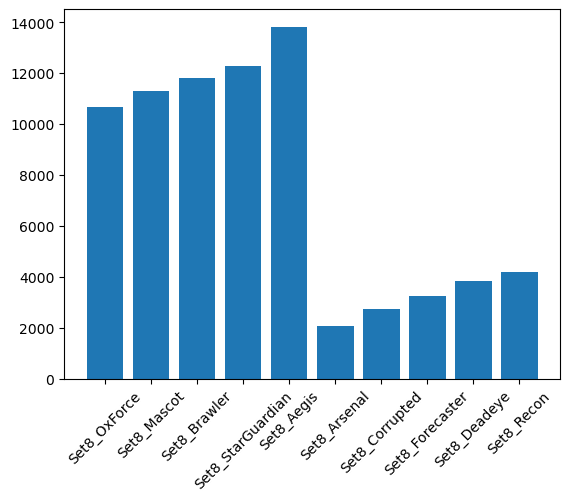

In [352]:
x = np.array(a[-5:] + a[:5])
x = x[:, 0]
y = np.array(a[-5:] + a[:5])
y = np.array(y[:, 1])
y = y.astype('int64')
plt.bar(x = x, height=y, )
plt.xticks(rotation=45)
plt.show()

Đối với tộc hệ ta nên chọn những tộc hệ được dùng nhiều, bởi chúng có sức mạnh tốt và được nhiều người tin tưởng để sử dụng chúng nhằm giành vị trí cao.

### VỊ TRÍ TRUNG BÌNH CỦA TỘC VÀ HỆ

Vì Puuid thay đổi theo thời gian nên list các tộc hệ sẽ bị trùng rất nhiều dẫn đến số lwuonjg trận đấu khác biệt sẽ nhỏ hơn số lượng thu thập

In [353]:
list_traits_df = pd.read_csv('../Data/process_data_tft_general_csv.csv', usecols= ['Placement', 'List Traits','ID Match']).drop_duplicates().reset_index(drop=True)

Tộc và hệ tốt nhất và tệ nhất ở top 1

In [354]:
all_traits = list_traits_df['List Traits'].to_list()

In [355]:
traits_on_top = {}
for i in range(1,9,1):
    temp = convert_string_to_list(list_traits_df, i, 'List Traits')
    temp1 = 'top_' + str(i)
    traits_on_top[temp1] = get_best_worst_traits(temp)

In [356]:
best_traits_on_top_1, worst_traits_on_top_1 = traits_on_top['top_1']
print(best_traits_on_top_1, "              ", worst_traits_on_top_1)

[('Set8_Arsenal', 368), ('Set8_Recon', 379), ('Set8_Deadeye', 535), ('Set8_Corrupted', 541), ('Set8_Defender', 588), ('Set8_Ace', 615), ('Set8_Hacker', 628), ('Set8_Forecaster', 633), ('Set8_Renegade', 803), ('Set8_Admin', 838), ('Set8_Supers', 877), ('Set8_Duelist', 893), ('Set8_GenAE', 1003), ('Set8_AnimaSquad', 1025), ('Set8_SpaceCorps', 1031), ('Set8_ExoPrime', 1035), ('Set8_Civilian', 1046), ('Set8_Threat', 1081), ('Set8_Channeler', 1123), ('Set8_Prankster', 1179), ('Set8_UndergroundThe', 1306), ('Set8_Heart', 1423), ('Set8_Brawler', 1446), ('Set8_OxForce', 1450), ('Set8_Mascot', 1575), ('Set8_StarGuardian', 1626), ('Set8_Aegis', 1859)]                [('Set8_Arsenal', 368), ('Set8_Recon', 379), ('Set8_Deadeye', 535), ('Set8_Corrupted', 541), ('Set8_Defender', 588)]


In [357]:
bar_chart = np.array(best_traits_on_top_1[-5:] + worst_traits_on_top_1)
best_traits_on_top_1[-5:]

[('Set8_Brawler', 1446),
 ('Set8_OxForce', 1450),
 ('Set8_Mascot', 1575),
 ('Set8_StarGuardian', 1626),
 ('Set8_Aegis', 1859)]

In [358]:
x = bar_chart[:, 0]
y = bar_chart[:, 1]
y = y.astype('int64')

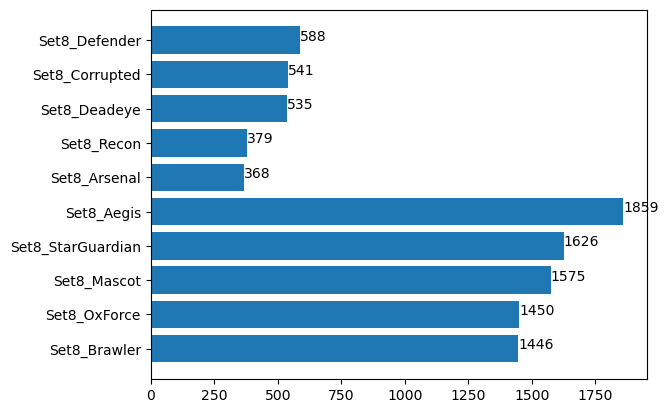

In [359]:
plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
 
plt.show()

Nếu bạn giành vị trí đầu tiên thì những tộc hệ sau đây không nên bỏ qua vì đây là các tộc hệ mà những người chơi top 1 hay sử dụng nhất đó.

### TỈ LỆ CỦA TỘC HỆ ĐÓ TRONG TRẬN ĐẤU VÀ SỐ LẦN XUẤT HIỆN CỦA TỘC HỆ TRONG TỪNG TOP CỦA TRẬN ĐẤU

traits_avg_top: tộc hệ trung bình trong các top trận đấu

traits_avg_on_match: tần suất xuất hiện của tộc hệ trong trận đấu

In [360]:
all_traits_df = pd.read_csv('../Data/TocHe.csv', usecols=['Trait'])

In [361]:
all_traits = all_traits_df['Trait'].to_list()

traits_avg_top:  vị trí trung bình của tộc hệ khi ở trong top từ 1 đến 8

traits_avg_on_match: tỉ lệ số trận đấu từ top 1 đến 8 mà tộc hệ đó được sử dụng

In [362]:
sum = 0
temp = 0
traits_avg_top = []
traits_avg_on_match = []
for item in all_traits:
    temp1 = []
    temp2 = []
    for i in range(1,9,1):
        cc = dict(traits_on_top['top_' + str(i)][0])
        if(item in cc):
            temp = temp+dict(traits_on_top['top_' + str(i)][0])[item]*i
            sum = sum + (dict(traits_on_top['top_' + str(i)][0])[item]) 
        temp2.append(sum/len(list_traits_df))
        traits_avg_on_match.append(temp2)
    temp1.append(temp/sum)
    traits_avg_top.append(temp1)
    
    temp = 0
    sum = 0

In [1]:
!nbmerge exploration_data_match_tft.ipynb explore_champion_augment.ipynb explore_items_traits_ranking.ipynb data_modeling_FIM_champion_items.ipynb data_modeling_for_item_and_champ.ipynb > final_notebook.ipynb